Comparisons of locomotion predictions of different mechanistic latent variable models.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

from disp import set_plot


STRAIN_KEY = '_'.join(['NM91', 'ZH23']).lower()
REG_KEY = 'ridge_alpha_10'

TARG_BHV = 'MTN'
TWDWS = [.03, 1, 60]
TARGS = [f'{TARG_BHV}_MN_{twdw}' for twdw in TWDWS]

PFX_BHV = f'data/simple/behav_xtd/behav_xtd'

MASKED = True

# Behavioral predictions from song features

## Best reservoir network prediction

In [2]:
LOAD_DIR = 'data/simple/mlv/rsvr'
PFX_RSVR = 'rsvr'

fnames = [fname for fname in os.listdir(LOAD_DIR) if fname.startswith(PFX_RSVR)]

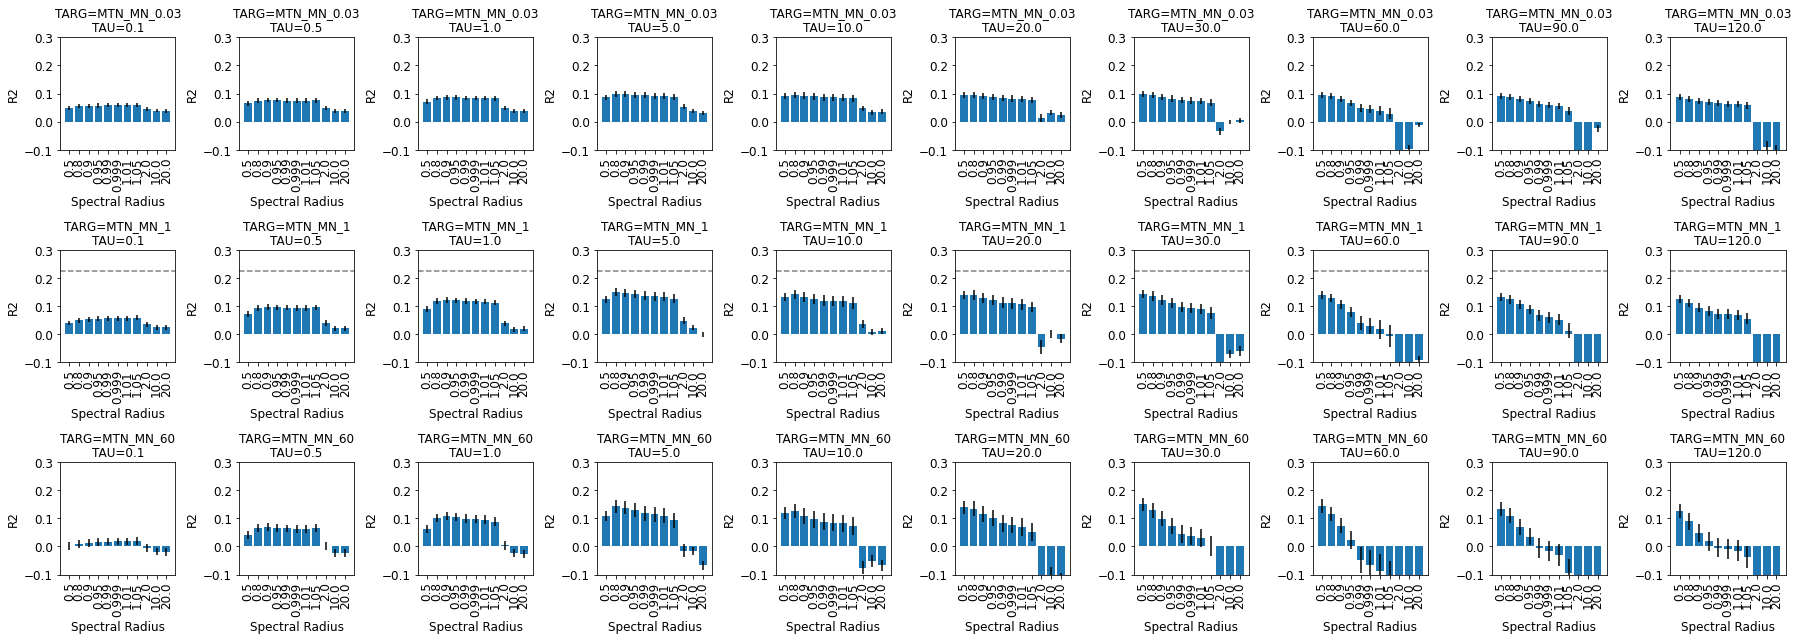

In [13]:
r2_test_mn_rsvrs = {targ: [] for targ in TARGS}
r2_test_sem_rsvrs = {targ: [] for targ in TARGS}

taus = []
radii = []

for fname in fnames:
    
    data = np.load(os.path.join(LOAD_DIR, fname), allow_pickle=True)[0]
    
    r2_trains = data['R2_TRAINS']
    r2_tests = data['R2_TESTS']
    
    radius = data['RADIUS']
    tau = data['TAU']
    
    for targ in TARGS:
        r2_test_mn_rsvrs[targ].append(np.mean(r2_tests[targ]))
        r2_test_sem_rsvrs[targ].append(stats.sem(r2_tests[targ]))
    
    taus.append(tau)
    radii.append(radius)
    
fig, axs = plt.subplots(3, len(np.unique(taus)), figsize=(25, 9), tight_layout=True)
for tau, ax_col in zip(sorted(np.unique(taus)), axs.T):
    iruns = (np.array(taus) == tau)
    radii_ = np.array(radii)[iruns]
    r2_test_mns_ = {targ: np.array(r2_test_mn_rsvrs[targ])[iruns] for targ in TARGS}
    r2_test_sems_ = {targ: np.array(r2_test_sem_rsvrs[targ])[iruns] for targ in TARGS}
    
    for targ, ax in zip(TARGS, ax_col):
        ax.bar(
            np.arange(len(radii_)),
            r2_test_mns_[targ][np.argsort(radii_)],
            yerr=r2_test_sems_[targ][np.argsort(radii_)]
        )
        
        if targ == 'MTN_MN_1':
            ax.axhline(.225, color='gray', ls='--')
            
        set_plot(
            ax, x_ticks=range(len(radii_)), y_lim=(-.1, .3),
            x_label='Spectral Radius', y_label='R2', title=f'TARG={targ}\nTAU={tau}')
        
        ax.set_xticklabels(sorted(radii_), rotation=90)
        
fig.savefig('supp/s20_rsvr.svg')

In [12]:
r2_rsvr_imaxs = {targ: np.argmax(r2_test_mn_rsvrs[targ]) for targ in TARGS}
r2_rsvr_mn_maxs = {targ: r2_test_mn_rsvrs[targ][r2_rsvr_imax] for targ, r2_rsvr_imax in r2_rsvr_imaxs.items()}
r2_rsvr_sem_maxs = {targ: r2_test_sem_rsvrs[targ][r2_rsvr_imax] for targ, r2_rsvr_imax in r2_rsvr_imaxs.items()} 